Doing the calculations and making the plot for Figure 5 - the JLAT emergent constraint

In [149]:
import importlib
import xarray as xr
import numpy as np
import sys
import matplotlib.pyplot as plt

from ecpaper_utils import linfit_utils as linfit
from ecpaper_utils import bootstrap_utils as boot
from ecpaper_utils import constraint_utils as constraint
from ecpaper_utils import fig_utils as ecfig
from matplotlib.patches import Rectangle

importlib.reload(linfit)
importlib.reload(boot)
importlib.reload(constraint)
importlib.reload(ecfig)

import warnings
warnings.filterwarnings('ignore')


In [10]:
datdir="/project/cas/islas/python/ecpaper2020/DATASORT/SHJET/DATA/"
errordatdir="../ERRORCALC/JLAT/DATA/"

Read in CMIP5 and CMIP6 jet latitude data

In [11]:
cmip5 = xr.open_dataset(datdir+"jlatcmip5.nc")
cmip6 = xr.open_dataset(datdir+"jlatcmip6.nc")
error1mem = xr.open_dataset(errordatdir+"errors_1mem.nc")
errorem5 = xr.open_dataset(errordatdir+"errors_cmip5.nc")
errorem6 = xr.open_dataset(errordatdir+"errors_cmip6.nc")

In [68]:
print(errorem5)
print(errorem6)

<xarray.Dataset>
Dimensions:  (Model: 37)
Coordinates:
  * Model    (Model) object 'ACCESS1-0' 'ACCESS1-3' ... 'NorESM1-M' 'NorESM1-ME'
Data variables:
    sigx     (Model) float64 0.6036 0.6036 0.6036 ... 0.6036 0.6036 0.6036
    sigy     (Model) float64 0.7883 0.7883 0.7883 ... 0.7883 0.7883 0.7883
    rxy      (Model) float64 -0.7926 -0.7926 -0.7926 ... -0.7926 -0.7926 -0.7926
<xarray.Dataset>
Dimensions:  (Model: 38)
Coordinates:
  * Model    (Model) object 'ACCESS-CM2' 'ACCESS-ESM1-5' ... 'UKESM1-0-LL'
Data variables:
    sigx     (Model) float64 0.4071 0.332 0.2562 0.332 ... 0.332 0.583 0.286
    sigy     (Model) float64 0.6395 0.4468 0.5486 0.5953 ... 0.5953 0.7695 0.366
    rxy      (Model) float64 -0.6343 -0.7523 -0.4586 ... -0.565 -0.7516 -0.7814


Read in observational data and group together

In [12]:
obsdata =xr.open_dataset(datdir+"jlatobs.nc")
jlatobs = np.zeros([4])
jlatobs[0] = obsdata.jlatera5 ; jlatobs[1] = obsdata.jlaterai
jlatobs[2] = obsdata.jlatjra ; jlatobs[3] = obsdata.jlatmerra

The CMIP5 emergent constraint

In [13]:
cmip5ols = constraint.dotheconstraint(cmip5['jlatemp'],cmip5['jlatemf']-cmip5['jlatemp'], cmip5['jlat1memp'], cmip5['jlat1memf']-cmip5['jlat1memp'],jlatobs, 
                                     sigyem=errorem5['sigy'], sigx1mem=error1mem['sigx_1mem'], sigy1mem=error1mem['sigy_1mem'],method='OLS')
cmip5tls = constraint.dotheconstraint(cmip5['jlatemp'],cmip5['jlatemf']-cmip5['jlatemp'], cmip5['jlat1memp'], cmip5['jlat1memf']-cmip5['jlat1memp'],jlatobs, 
                                     sigxem=errorem5['sigx'], sigyem=errorem5['sigy'], sigx1mem=error1mem['sigx_1mem'], sigy1mem=error1mem['sigy_1mem'],method='TLS')
cmip5bhm = constraint.dotheconstraint(cmip5['jlatemp'],cmip5['jlatemf']-cmip5['jlatemp'], cmip5['jlat1memp'], cmip5['jlat1memf']-cmip5['jlat1memp'],jlatobs, 
                                     sigxem=errorem5['sigx'], sigyem=errorem5['sigy'], sigx1mem=error1mem['sigx_1mem'], sigy1mem=error1mem['sigy_1mem'], rxyem=errorem5['rxy'],
                                     rxy1mem=error1mem['rxy_1mem'],method='BHM')

Constraining using OLS
starting to calculate the percentiles - this could take a while
calculating the percentage greater than the ensemble mean - this may also take a while
Constraining using TLS
starting to calculate the percentiles - this could take a while
calculating the percentage greater than the ensemble mean - this may also take a while
Constraining using the BHM
starting to calculate the percentiles - this could take a while
calculating the percentage greater than the ensemble mean - this may also take a while


The CMIP6 emergent constraint

In [14]:
cmip6ols = constraint.dotheconstraint(cmip6['jlatemp'],cmip6['jlatemf']-cmip6['jlatemp'], cmip6['jlat1memp'], cmip6['jlat1memf']-cmip6['jlat1memp'],jlatobs, 
                                     sigyem=errorem6['sigy'], sigx1mem=error1mem['sigx_1mem'], sigy1mem=error1mem['sigy_1mem'],method='OLS')
cmip6tls = constraint.dotheconstraint(cmip6['jlatemp'],cmip6['jlatemf']-cmip6['jlatemp'], cmip6['jlat1memp'], cmip6['jlat1memf']-cmip6['jlat1memp'],jlatobs, 
                                     sigxem=errorem6['sigx'], sigyem=errorem6['sigy'], sigx1mem=error1mem['sigx_1mem'], sigy1mem=error1mem['sigy_1mem'],method='TLS')
cmip6bhm = constraint.dotheconstraint(cmip6['jlatemp'],cmip6['jlatemf']-cmip6['jlatemp'], cmip6['jlat1memp'], cmip6['jlat1memf']-cmip6['jlat1memp'],jlatobs, 
                                     sigxem=errorem6['sigx'], sigyem=errorem6['sigy'], sigx1mem=error1mem['sigx_1mem'], sigy1mem=error1mem['sigy_1mem'], rxyem=errorem6['rxy'],
                                     rxy1mem=error1mem['rxy_1mem'],method='BHM')

Constraining using OLS
starting to calculate the percentiles - this could take a while
calculating the percentage greater than the ensemble mean - this may also take a while
Constraining using TLS
starting to calculate the percentiles - this could take a while
calculating the percentage greater than the ensemble mean - this may also take a while
Constraining using the BHM
starting to calculate the percentiles - this could take a while
calculating the percentage greater than the ensemble mean - this may also take a while


The constraint on CMIP5 and CMIP6 combined

In [66]:
print(errorem56)

<xarray.Dataset>
Dimensions:  (Model: 75, model: 2)
Coordinates:
  * Model    (Model) object 'ACCESS-CM2' 'ACCESS-ESM1-5' ... 'inmcm4'
Dimensions without coordinates: model
Data variables:
    sigx     (model, Model) float64 nan nan 0.6036 0.6036 ... 0.286 nan nan nan
    sigy     (model, Model) float64 nan nan 0.7883 0.7883 ... 0.366 nan nan nan
    rxy      (model, Model) float64 nan nan -0.7926 -0.7926 ... nan nan nan


In [79]:
cmip56 = xr.concat([cmip5, cmip6], "model" )
errorem56 = xr.concat([errorem5, errorem6],"Model")
cmip56ols = constraint.dotheconstraint(cmip56['jlatemp'],cmip56['jlatemf']-cmip56['jlatemp'], cmip56['jlat1memp'], cmip56['jlat1memf']-cmip56['jlat1memp'],jlatobs, 
                                     sigyem=errorem56['sigy'], sigx1mem=error1mem['sigx_1mem'], sigy1mem=error1mem['sigy_1mem'],method='OLS')
cmip56tls = constraint.dotheconstraint(cmip56['jlatemp'],cmip56['jlatemf']-cmip56['jlatemp'], cmip56['jlat1memp'], cmip56['jlat1memf']-cmip56['jlat1memp'],jlatobs, 
                                     sigxem=errorem56['sigx'], sigyem=errorem56['sigy'], sigx1mem=error1mem['sigx_1mem'], sigy1mem=error1mem['sigy_1mem'],method='TLS')
cmip56bhm = constraint.dotheconstraint(cmip56['jlatemp'],cmip56['jlatemf']-cmip56['jlatemp'], cmip56['jlat1memp'], cmip56['jlat1memf']-cmip56['jlat1memp'],jlatobs, 
                                     sigxem=errorem56['sigx'], sigyem=errorem56['sigy'], sigx1mem=error1mem['sigx_1mem'], sigy1mem=error1mem['sigy_1mem'], rxyem=errorem56['rxy'],
                                     rxy1mem=error1mem['rxy_1mem'],method='BHM')

aols, bols = linfit.linfit_xy(cmip56['jlatemp'], cmip56['jlatemf']-cmip56['jlatemp'], sigma=errorem56['sigy'])
atls, btls = linfit.tls(cmip56['jlatemp'], cmip56['jlatemf']-cmip56['jlatemp'], errorem56['sigx'], errorem56['sigy'])
abhmall, bbhmall, del2all, muxall, delx2all = linfit.bhm(cmip56['jlatemp'], cmip56['jlatemf']-cmip56['jlatemp'], errorem56['sigx'], errorem56['sigy'], errorem56['rxy'], iseed=3)
abhm = np.mean(abhmall) ; bbhm = np.mean(bbhmall)

Constraining using OLS
starting to calculate the percentiles - this could take a while
calculating the percentage greater than the ensemble mean - this may also take a while
Constraining using TLS
starting to calculate the percentiles - this could take a while
calculating the percentage greater than the ensemble mean - this may also take a while
Constraining using the BHM
starting to calculate the percentiles - this could take a while
calculating the percentage greater than the ensemble mean - this may also take a while


In [41]:
print(jlatobs)

[-50.17796433 -49.93644861 -50.63344942 -51.87873568]


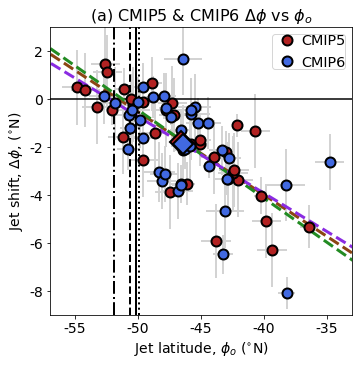

In [167]:
# set up the plot characteristics
#fig, axs = plt.subplots()
#fig.set_size_inches(5,5)
fig = plt.figure()
w=12 ; h=5
fig.set_size_inches(w,h)
ax1 = fig.add_axes(np.array([0.05,0.1,0.35,0.8]))


yerr5 = 1.96*errorem5['sigy'] ; yerr6 = 1.96*errorem6['sigy']
xerr5 = 1.95*errorem5['sigx'] ; xerr6 = 1.95*errorem6['sigy']

ax1 = ecfig.jlatscattersetup(ax1,'(a) CMIP5 & CMIP6 $\Delta \phi$ vs $\phi_{o}$')

# zero line
ax1.plot([-57,-33],[0,0], color="black")

# OLS regression
x = np.arange(-58,-22,1)
y = aols+bols*x
ax1.plot(x,y, color='saddlebrown', linewidth=3, linestyle='dashed')

# TLS regression
y = atls+btls*x
ax1.plot(x,y, color='forestgreen', linewidth=3, linestyle='dashed')

# BHM regression
y = abhm + bbhm*x
ax1.plot(x,y, color='blueviolet', linewidth=3, linestyle='dashed')

# observed values
ax1.plot([obsdata["jlatera5"], obsdata["jlatera5"]],[-9,3], color="black", linewidth=2)
ax1.plot([obsdata["jlaterai"], obsdata["jlaterai"]],[-9,3], color="black", linestyle='dotted', linewidth=2)
ax1.plot([obsdata["jlatjra"], obsdata["jlatjra"]],[-9,3], color="black", linestyle='dashed', linewidth=2)
ax1.plot([obsdata["jlatmerra"], obsdata["jlatmerra"]],[-9,3],color="black", linestyle='dashdot', linewidth=2)

# scatter points and error bars
ax1.plot(cmip5['jlatemp'],cmip5['jlatemf']-cmip5['jlatemp'],"o", markerfacecolor='firebrick', markeredgecolor='black', markersize=10, markeredgewidth=2, label='CMIP5')
ax1.plot(cmip6['jlatemp'],cmip6['jlatemf']-cmip6['jlatemp'],"o", markerfacecolor='royalblue', markeredgecolor='black', markersize=10, markeredgewidth=2, label='CMIP6')

ax1.plot(cmip5['jlatemp'].mean(), cmip5['jlatemf'].mean()-cmip5['jlatemp'].mean(), "D", markerfacecolor='firebrick', markeredgecolor='black', markersize=15, markeredgewidth=2)
ax1.plot(cmip6['jlatemp'].mean(), cmip6['jlatemf'].mean()-cmip6['jlatemp'].mean(), "D", markerfacecolor='royalblue', markeredgecolor='black', markersize=14, markeredgewidth=2)

ax1.errorbar(cmip5['jlatemp'], cmip5['jlatemf']-cmip5['jlatemp'], xerr = xerr5, linestyle="None", color="lightgray", linewidth=2)
ax1.errorbar(cmip5['jlatemp'], cmip5['jlatemf']-cmip5['jlatemp'], yerr = yerr5, linestyle="None", color="lightgray", linewidth=2)
ax1.errorbar(cmip6['jlatemp'], cmip6['jlatemf']-cmip6['jlatemp'], xerr = xerr6, linestyle="None", color="lightgray", linewidth=2)
ax1.errorbar(cmip6['jlatemp'], cmip6['jlatemf']-cmip6['jlatemp'], yerr = yerr6, linestyle="None", color="lightgray", linewidth=2)

ax1.legend(handletextpad=0, fontsize='x-large', borderpad=0)




In [168]:
#fig, axs = plt.subplots()
#fig.set_size_inches(3.5,5)

ax2 = fig.add_axes(np.array([0.43,0.1,0.23,0.8]))

ax2.set_ylim(-9,3)
ax2.set_xlim(-0.5,16.5)
ax2.set_xticks([])
ax2.set_yticks([-8,-6,-4,-2,0,2])
ax2.set_yticklabels(['-8','-6','-4','-2','0','2'], fontsize=14)
ax2.set_title('(b) CMIP5', fontsize=16)

# internal variability range and zero line
ivrange = plt.Rectangle( (-0.5,error1mem['ivmin95']), 17, error1mem['ivmax95']-error1mem['ivmin95'], color='lightgray', zorder=0)
ax2.add_patch(ivrange)
ax2.plot([-0.5,16.5],[0,0], color='black', zorder=1)

jlatdifs = cmip5['jlatemf'] - cmip5['jlatemp']
min66 = np.percentile(jlatdifs, 17)
max66 = np.percentile(jlatdifs, 83)

ax2.plot([-0.5,16.5],[jlatdifs.mean(), jlatdifs.mean()],color='firebrick', zorder=1, linewidth=5)
ax2.plot([-0.5,16.5],[min66, min66],color='firebrick', zorder=1, linewidth=3, linestyle='dotted')
ax2.plot([-0.5,16.5],[max66, max66],color='firebrick', zorder=1, linewidth=3, linestyle='dotted')

shiftstring = '{0:6.2f}'.format(np.array(jlatdifs.mean())).strip()
ax2.text(1,-9.3, '$\Delta \phi$=', horizontalalignment='center', verticalalignment='center', fontsize=10, color='black')
ax2.text(1, -9.8, jshiftstring, horizontalalignment='center', verticalalignment='center', fontsize=10, color='black')

# CMIP5 model points
ax2.plot(np.zeros([cmip5.model.size])+1,cmip5['jlatemf']-cmip5['jlatemp'],"o",markerfacecolor='firebrick',markeredgecolor='black',markersize=10,markeredgewidth=2)
ax2.plot([2.5,2.5],[-9,3], color='black')

# all the emergent constraints info
ax2 = ecfig.plotconstraintinfo(ax2, cmip5ols, cmip5tls, cmip5bhm)

In [169]:
ax3 = fig.add_axes(np.array([0.69,0.1,0.23,0.8]))

ax3.set_ylim(-9,3)
ax3.set_xlim(-0.5,16.5)
ax3.set_xticks([])
ax3.set_yticks([-8,-6,-4,-2,0,2])
ax3.set_yticklabels(['-8','-6','-4','-2','0','2'], fontsize=14)
ax3.set_title('(c) CMIP6', fontsize=16)

# internal variability range and zero line
ivrange = plt.Rectangle( (-0.5,error1mem['ivmin95']), 17, error1mem['ivmax95']-error1mem['ivmin95'], color='lightgray', zorder=0)
ax3.add_patch(ivrange)
ax3.plot([-0.5,16.5],[0,0], color='black', zorder=1)

jlatdifs = cmip6['jlatemf'] - cmip6['jlatemp']
min66 = np.percentile(jlatdifs, 17)
max66 = np.percentile(jlatdifs, 83)

ax3.plot([-0.5,16.5],[jlatdifs.mean(), jlatdifs.mean()],color='royalblue', zorder=1, linewidth=5)
ax3.plot([-0.5,16.5],[min66, min66],color='royalblue', zorder=1, linewidth=3, linestyle='dotted')
ax3.plot([-0.5,16.5],[max66, max66],color='royalblue', zorder=1, linewidth=3, linestyle='dotted')

shiftstring = '{0:6.2f}'.format(np.array(jlatdifs.mean())).strip()
ax3.text(1,-9.3, '$\Delta \phi$=', horizontalalignment='center', verticalalignment='center', fontsize=10, color='black')
ax3.text(1, -9.8, jshiftstring, horizontalalignment='center', verticalalignment='center', fontsize=10, color='black')

# CMIP6 model points
ax3.plot(np.zeros([cmip6.model.size])+1,cmip6['jlatemf']-cmip6['jlatemp'],"o",markerfacecolor='royalblue',markeredgecolor='black',markersize=10,markeredgewidth=2)
ax3.plot([2.5,2.5],[-9,3], color='black')

# all the emergent constraints info
ax3 = ecfig.plotconstraintinfo(ax3, cmip6ols, cmip6tls, cmip6bhm)

In [170]:
ax4 = fig.add_axes(np.array([0.95,0.1,0.23,0.8]))

ax4.set_ylim(-9,3)
ax4.set_xlim(-0.5,16.5)
ax4.set_xticks([])
ax4.set_yticks([-8,-6,-4,-2,0,2])
ax4.set_yticklabels(['-8','-6','-4','-2','0','2'], fontsize=14)
ax4.set_title('(d) CMIP56', fontsize=16)

# internal variability range and zero line
ivrange = plt.Rectangle( (-0.5,error1mem['ivmin95']), 17, error1mem['ivmax95']-error1mem['ivmin95'], color='lightgray', zorder=0)
ax4.add_patch(ivrange)
ax4.plot([-0.5,16.5],[0,0], color='black', zorder=1)

jlatdifs = cmip56['jlatemf'] - cmip56['jlatemp']
min66 = np.percentile(jlatdifs, 17)
max66 = np.percentile(jlatdifs, 83)

ax4.plot([-0.5,16.5],[jlatdifs.mean(), jlatdifs.mean()],color='royalblue', zorder=1, linewidth=5)
ax4.plot([-0.45,16.5],[jlatdifs.mean(), jlatdifs.mean()],color='firebrick', zorder=1, linewidth=5, linestyle='dotted')
ax4.plot([-0.5,16.5],[min66, min66],color='royalblue', zorder=1, linewidth=3, linestyle='dashed')
ax4.plot([-0.5,16.5],[min66, min66],color='firebrick', zorder=1, linewidth=3, linestyle='dotted')
ax4.plot([-0.5,16.5],[max66, max66],color='royalblue', zorder=1, linewidth=3, linestyle='dashed')
ax4.plot([-0.5,16.5],[max66, max66],color='firebrick', zorder=1, linewidth=3, linestyle='dotted')

shiftstring = '{0:6.2f}'.format(np.array(jlatdifs.mean())).strip()
ax4.text(1,-9.3, '$\Delta \phi$=', horizontalalignment='center', verticalalignment='center', fontsize=10, color='black')
ax4.text(1, -9.8, jshiftstring, horizontalalignment='center', verticalalignment='center', fontsize=10, color='black')

# CMIP5 and 6 model points
ax4.plot(np.zeros([cmip5.model.size])+0.4,cmip5['jlatemf']-cmip5['jlatemp'],"o",markerfacecolor='firebrick',markeredgecolor='black',markersize=10,markeredgewidth=2)
ax4.plot(np.zeros([cmip6.model.size])+1.6,cmip6['jlatemf']-cmip6['jlatemp'],"o",markerfacecolor='royalblue',markeredgecolor='black',markersize=10,markeredgewidth=2)
ax4.plot([2.5,2.5],[-9,3], color='black')

# all the emergent constraints info
ax4 = ecfig.plotconstraintinfo(ax4, cmip56ols, cmip56tls, cmip56bhm)

In [171]:
# the legend
legendparts=[Rectangle((0.95,0.95),5,3,facecolor='saddlebrown'),
             Rectangle((0.95,0.95),5,3,facecolor='forestgreen'),
             Rectangle((0.95,0.95),5,3,facecolor='blueviolet')]

legendlabels=['OLS','TLS','BHM']
fig.legend(legendparts, legendlabels, bbox_to_anchor=(0.95, 0.05), ncol=3, frameon=False, fontsize='x-large', handlelength=1, handleheight=1, handletextpad=0.4)






In [174]:
fig.patch.set_facecolor('white')
fig
fig.savefig('fig5.png', facecolor='white', bbox_inches='tight')

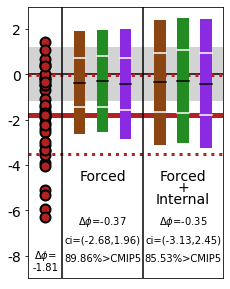

In [58]:
fig, axs = plt.subplots()
fig.set_size_inches(3.5,5)

axs.set_ylim(-9,3)
axs.set_xlim(-0.5,16.5)

# internal variability range
ivrange = plt.Rectangle( (-0.5,error1mem['ivmin95']), 17, error1mem['ivmax95']-error1mem['ivmin95'], color='lightgray', zorder=0)
axs.add_patch(ivrange)
axs.plot([-0.5,16.5],[0,0], color='black', zorder=1)
axs.set_xticks([])
axs.set_yticks([-8,-6,-4,-2,0,2])
axs.set_yticklabels(['-8','-6','-4','-2','0','2'], fontsize=14)

jlatdifs = cmip5['jlatemf'] - cmip5['jlatemp']
min66 = np.percentile(jlatdifs, 17)
max66 = np.percentile(jlatdifs, 83)

axs.plot([-0.5,16.5],[jlatdifs.mean(), jlatdifs.mean()],color='firebrick', zorder=1, linewidth=5)
axs.plot([-0.5,16.5],[min66, min66],color='firebrick', zorder=1, linewidth=3, linestyle='dotted')
axs.plot([-0.5,16.5],[max66, max66],color='firebrick', zorder=1, linewidth=3, linestyle='dotted')

# adding the text to the plot
shiftstring = '{0:6.2f}'.format(np.array(jlatdifs.mean())).strip()
axs.text(1,-8, '$\Delta \phi$=', horizontalalignment='center', verticalalignment='center', fontsize=10, color='black')
axs.text(1, -8.5, jshiftstring, horizontalalignment='center', verticalalignment='center', fontsize=10, color='black')
axs.text(6, -4.5 ,'Forced', horizontalalignment='center', verticalalignment='center', fontsize=14, color='black')
axs.text(13, -4.5 ,'Forced', horizontalalignment='center', verticalalignment='center', fontsize=14, color='black')
axs.text(13,-5,'+', horizontalalignment='center', verticalalignment='center', fontsize=14, color='black')
axs.text(13, -5.5,'Internal', horizontalalignment='center', verticalalignment='center', fontsize=14, color='black')

meanforced = (cmip5ols['meanforced'] + cmip5tls['meanforced'] + cmip5bhm['meanforced'])/3.
meanwithiv = (cmip5ols['meanwithiv'] + cmip5tls['meanwithiv'] + cmip5bhm['meanwithiv'])/3.
min95forced = (cmip5ols['min95forced'] + cmip5tls['min95forced'] + cmip5bhm['min95forced'])/3.
max95forced = (cmip5ols['max95forced'] + cmip5tls['max95forced'] + cmip5bhm['max95forced'])/3.
min95withiv = (cmip5ols['min95withiv'] + cmip5tls['min95withiv'] + cmip5bhm['min95withiv'])/3.
max95withiv = (cmip5ols['max95withiv'] + cmip5tls['max95withiv'] + cmip5bhm['max95withiv'])/3.

meanforcedstr = '{0:6.2f}'.format(np.array(meanforced)).strip()
meanwithivstr = '{0:6.2f}'.format(np.array(meanwithiv)).strip()
axs.text(6,-6.5,'$\Delta \phi$='+meanforcedstr, horizontalalignment='center', verticalalignment='center', fontsize=10, color='black')
axs.text(13,-6.5,'$\Delta \phi$='+meanwithivstr, horizontalalignment='center', verticalalignment='center', fontsize=10, color='black')
min95forcedstr = '{0:6.2f}'.format(min95forced).strip()
max95forcedstr = '{0:6.2f}'.format(max95forced).strip()
min95withivstr = '{0:6.2f}'.format(min95withiv).strip()
max95withivstr = '{0:6.2f}'.format(max95withiv).strip()
axs.text(6,-7.3,'ci=('+min95forcedstr+','+max95forcedstr+')', horizontalalignment='center', verticalalignment='center', fontsize=10, color='black')
axs.text(13,-7.3,'ci=('+min95withivstr+','+max95withivstr+')', horizontalalignment='center', verticalalignment='center', fontsize=10, color='black')
gtforcedstr = '{0:6.2f}'.format(cmip5ols['gtymean_forced']).strip()
gtwithivstr = '{0:6.2f}'.format(cmip5ols['gtymean_withiv']).strip()
axs.text(6,-8.1,gtforcedstr+"%>CMIP5", horizontalalignment='center', verticalalignment='center', fontsize=10, color='black')
axs.text(13,-8.1,gtwithivstr+"%>CMIP5", horizontalalignment='center', verticalalignment='center', fontsize=10, color='black')

# CMIP4 model points
axs.plot(np.zeros([cmip5.model.size])+1,cmip5['jlatemf']-cmip5['jlatemp'],"o",markerfacecolor='firebrick',markeredgecolor='black',markersize=10,markeredgewidth=2)
axs.plot([2.5,2.5],[-9,3], color='black')

# OLS CMIP5
axs.bar(4,cmip5ols['max95forced']-cmip5ols['min95forced'],bottom=cmip5ols['min95forced'], color='saddlebrown', width=1, zorder=2)
axs.plot([4-0.5,4+0.5],[cmip5ols['min66forced'],cmip5ols['min66forced']], color='white')
axs.plot([4-0.5,4+0.5],[cmip5ols['max66forced'],cmip5ols['max66forced']], color='white')
axs.plot([4-0.5,4+0.5],[cmip5ols['meanforced'],cmip5ols['meanforced']], color='black')

axs.bar(6,cmip5tls['max95forced']-cmip5tls['min95forced'],bottom=cmip5tls['min95forced'], color='forestgreen', width=1, zorder=2)
axs.plot([6-0.5,6+0.5],[cmip5tls['min66forced'],cmip5tls['min66forced']], color='white')
axs.plot([6-0.5,6+0.5],[cmip5tls['max66forced'],cmip5tls['max66forced']], color='white')
axs.plot([6-0.5,6+0.5],[cmip5tls['meanforced'],cmip5tls['meanforced']], color='black')

axs.bar(8,cmip5bhm['max95forced']-cmip5bhm['min95forced'],bottom=cmip5bhm['min95forced'], color='blueviolet', width=1, zorder=2)
axs.plot([8-0.5,8+0.5],[cmip5bhm['min66forced'],cmip5bhm['min66forced']], color='white')
axs.plot([8-0.5,8+0.5],[cmip5bhm['max66forced'],cmip5bhm['max66forced']], color='white')
axs.plot([8-0.5,8+0.5],[cmip5bhm['meanforced'],cmip5bhm['meanforced']], color='black')

axs.plot([9.5,9.5],[-9,3], color='black')

axs.bar(11,cmip5ols['max95withiv']-cmip5ols['min95withiv'],bottom=cmip5ols['min95withiv'], color='saddlebrown', width=1, zorder=2)
axs.plot([11-0.5,11+0.5],[cmip5ols['min66withiv'],cmip5ols['min66withiv']], color='white')
axs.plot([11-0.5,11+0.5],[cmip5ols['max66withiv'],cmip5ols['max66withiv']], color='white')
axs.plot([11-0.5,11+0.5],[cmip5ols['meanwithiv'],cmip5ols['meanwithiv']], color='black')

axs.bar(13,cmip5tls['max95withiv']-cmip5tls['min95withiv'],bottom=cmip5tls['min95withiv'], color='forestgreen', width=1, zorder=2)
axs.plot([13-0.5,13+0.5],[cmip5tls['min66withiv'],cmip5tls['min66withiv']], color='white')
axs.plot([13-0.5,13+0.5],[cmip5tls['max66withiv'],cmip5tls['max66withiv']], color='white')
axs.plot([13-0.5,13+0.5],[cmip5tls['meanwithiv'],cmip5tls['meanwithiv']], color='black')

axs.bar(15,cmip5bhm['max95withiv']-cmip5bhm['min95withiv'],bottom=cmip5bhm['min95withiv'], color='blueviolet', width=1, zorder=2)
axs.plot([15-0.5,15+0.5],[cmip5bhm['min66withiv'],cmip5bhm['min66withiv']], color='white')
axs.plot([15-0.5,15+0.5],[cmip5bhm['max66withiv'],cmip5bhm['max66withiv']], color='white')
axs.plot([15-0.5,15+0.5],[cmip5bhm['meanwithiv'],cmip5bhm['meanwithiv']], color='black')




In [71]:
#OLS constraint

jlatpem = cmip5['jlatemp'] ; jlatfem = cmip5['jlatemf']
jlatp1mem = cmip5['jlat1memp'] ; jlatf1mem = cmip5['jlat1memf']
sigx = error1mem['sigx_1mem']

aols, bols = linfit.linfit_xy(jlatpem, jlatfem-jlatpem, sigma=errorem5['sigy'])
jlatdifec = aols + bols*jlatp1mem
residuals = (jlatf1mem-jlatp1mem) - jlatdifec 
sigmaresiduals = np.std(residuals)
sigma_iv_delta = np.sqrt(sigmaresiduals**2. - (bols**2)*error1mem['sigx_1mem'])
sigmaiv = error1mem['sigy_1mem'] # standard deviation of internal variability component of residuals
sigmanoiv = np.sqrt(sigma_iv_delta**2. - sigmaiv**2.) # standard deviation of residuals excluding the internal variability component


# sampling uncertainty on observed predictor
obssample = np.random.normal(0,error1mem['sigx_1mem'],250)
jlatobs = np.zeros([4])
jlatobs[0] = obsdata.jlatera5 ; jlatobs[1] = obsdata.jlaterai
jlatobs[2] = obsdata.jlatjra ; jlatobs[3] = obsdata.jlatmerra
jlatobspdf = np.zeros([4*250])
for iobs in range(0,jlatobs.size,1):
    jlatobspdf[iobs*250:(iobs+1)*250]=jlatobs[iobs]+obssample[:]

# sampling the uncertainty due to the combined influence of internal variability and other differences in the forced response not explained by the EC
randomvals = np.random.normal(0,1,1000)
#noise_withiv = np.zeros([1000]) ; noise_forced = np.zeros([1000]) 
noise_withiv = randomvals*np.array(sigma_iv_delta)
noise_forced = randomvals*np.array(sigmanoiv)
    

# bootstrapping the regression coefficients
aboots, bboots = boot.boot_regcoefs(jlatpem,jlatfem-jlatpem,sigy=errorem5['sigy'])

y = np.zeros([4*250*1000])
for iboot in range(0,1000,1):
    y[iboot*4*250:(iboot+1)*4*250] = aboots[iboot]+bboots[iboot]*jlatobspdf[:]


yplusiv = np.zeros([4*250*1000*1000])
yforced = np.zeros([4*250*1000*1000])

for iboot  in range(0,1000,1):
    yplusiv[iboot*(4*250*1000):(iboot+1)*(4*250*1000)] = y[:] + noise_withiv[iboot]
    yforced[iboot*(4*250*1000):(iboot+1)*(4*250*1000)] = y[:] + noise_forced[iboot]
    
    
    

In [5]:
# sampling uncertainty on observed predictor
obssample = np.random.normal(0,error1mem['sigx_1mem'],250)
jlatobs = np.zeros([4])
jlatobs[0] = obsdata.jlatera5 ; jlatobs[1] = obsdata.jlaterai
jlatobs[2] = obsdata.jlatjra ; jlatobs[3] = obsdata.jlatmerra

In [22]:
testbhm = constraint.dotheconstraint(cmip5['jlatemp'],cmip5['jlatemf']-cmip5['jlatemp'], cmip5['jlat1memp'], cmip5['jlat1memf']-cmip5['jlat1memp'],jlatobs, 
                                     sigxem=errorem5['sigx'], sigyem=errorem5['sigy'], sigx1mem=error1mem['sigx_1mem'], sigy1mem=error1mem['sigy_1mem'], rxyem=errorem5['rxy'],
                                     rxy1mem=error1mem['rxy_1mem'],method='BHM')

Constraining using the BHM
starting to calculate the percentiles - this could take a while
calculating the percentage greater than the ensemble mean - this may also take a while


In [23]:
print(testbhm)

{'meanwithiv': -0.4085176803822673, 'meanforced': -0.4306643214718394, 'min95withiv': -3.2431022147566, 'max95withiv': 2.457080854294564, 'min66withiv': -1.7779097368504004, 'max66withiv': 0.962158503385992, 'min95forced': -2.8442296902867312, 'max95forced': 1.9979468787280725, 'min66forced': -1.5802228933271347, 'max66forced': 0.7193733784956815, 'gtymean_withiv': 83.59752019999999, 'gtymean_forced': 87.3556789}


In [144]:
testtls = constraint.dotheconstraint(cmip5['jlatemp'],cmip5['jlatemf']-cmip5['jlatemp'], cmip5['jlat1memp'], cmip5['jlat1memf']-cmip5['jlat1memp'],jlatobs, 
                                     sigxem=errorem5['sigx'], sigyem=errorem5['sigy'], sigx1mem=error1mem['sigx_1mem'], sigy1mem=error1mem['sigy_1mem'], method='TLS')

not figured out the other methods yet
starting to calculate the percentiles - this could take a while
calculating the percentage greater than the ensemble mean - this may also take a while


In [145]:
print(testtls)

{'meanwithiv': -0.36308397573226475, 'meanforced': -0.3572397267100351, 'min95withiv': -2.8911169112640422, 'max95withiv': 2.3331810096137855, 'min66withiv': -1.6072351814463812, 'max66withiv': 0.9154991902306686, 'min95forced': -2.4247570589127188, 'max95forced': 1.8456815302836413, 'min66forced': -1.3799000337599208, 'max66forced': 0.6860882300636868, 'gtymean_withiv': 86.6239635, 'gtymean_forced': 91.2361092}


In [141]:
test = constraint.dotheconstraint(cmip5['jlatemp'],cmip5['jlatemf']-cmip5['jlatemp'], cmip5['jlat1memp'], cmip5['jlat1memf']-cmip5['jlat1memp'],jlatobs,  
                sigyem=errorem5['sigy'], sigy1mem=error1mem['sigy_1mem'], sigx1mem=error1mem['sigx_1mem'], method="TLS")

You need to specify the sigma_x for the ensemble mean for TLS or BHM


SystemExit: 

In [132]:
print(test)

{'meanwithiv': -0.43518625069395844, 'meanforced': -0.4251871877637539, 'min95withiv': -3.065366124225884, 'max95withiv': 2.3398071866791925, 'min66withiv': -1.7157184327406931, 'max66withiv': 0.8542368227117723, 'min95forced': -2.576532028232252, 'max95forced': 1.8468410980028496, 'min66forced': -1.4777384567611325, 'max66forced': 0.6325497221887647, 'gtymean_withiv': 84.7420519, 'gtymean_forced': 89.5560897}


In [72]:
print(yforced.size)

1000000000


In [73]:
print(np.percentile(yforced, 2.5))

-2.653654909280397


In [ ]:
test = [5,6,7,8]
test = np.array(test)
sumval = sum(test > 6)

In [110]:
yforcedsort=np.sort(yforced)

In [111]:
test = np.percentile(yforcedsort, 2.5)

In [113]:
test = np.percentile(yforced, 2.5)

In [114]:
x=5 ; y=10
datout={ "x":x, "y":y}

In [115]:
print(datout)

{'x': 5, 'y': 10}


In [119]:
print(datout['x'])

5
